In [7]:
import pandas as pd
import numpy as np
import plotly as pl
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [8]:
data=pd.read_csv("cars_dataset.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [9]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

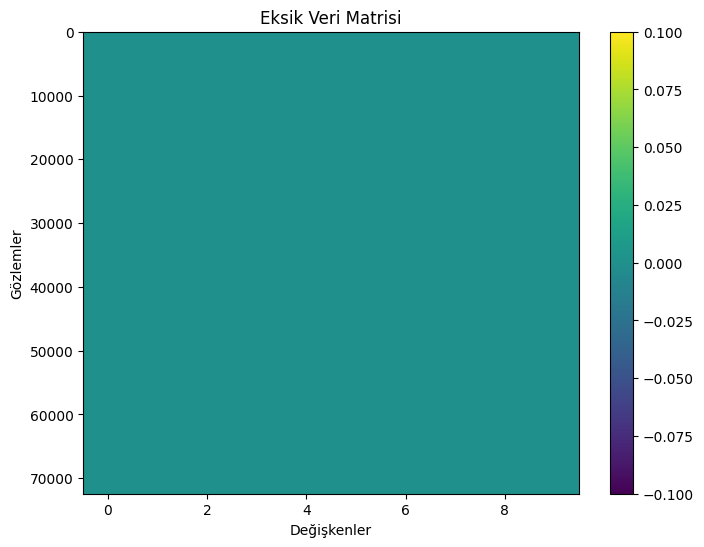

In [10]:
missing_data = data.isnull()


plt.figure(figsize=(8, 6))
plt.imshow(missing_data, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('Değişkenler')
plt.ylabel('Gözlemler')
plt.title('Eksik Veri Matrisi')
plt.show()

In [11]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

In [11]:
categoricals = list(data.select_dtypes('object').columns)
numericals = [col for col in data.columns if col not in categoricals]
print(categoricals)
print(numericals)

['model', 'transmission', 'fuelType', 'Make']
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [13]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10186.0


In [14]:
for index, value in data['model'].value_counts().items():
    print(index, ': ', value)

 Fiesta :  6556
 Golf :  4863
 Focus :  4588
 Polo :  3287
 3 Series :  2443
 Kuga :  2225
 Yaris :  2122
 1 Series :  1969
 Aygo :  1961
 A3 :  1929
 Tiguan :  1765
 Fabia :  1571
 Octavia :  1477
 Q3 :  1417
 A4 :  1381
 A1 :  1347
 Tucson :  1300
 2 Series :  1229
 EcoSport :  1143
 I10 :  1092
 5 Series :  1056
 4 Series :  995
 Passat :  915
 Up :  884
 A5 :  882
 Q5 :  877
 Q2 :  822
 X1 :  804
 Superb :  791
 A6 :  748
 T-Roc :  733
 Auris :  712
 X3 :  551
 C-MAX :  543
 I30 :  536
 Ka+ :  531
 Mondeo :  526
 I20 :  496
 C-HR :  479
 RAV4 :  473
 Kodiaq :  472
 Citigo :  470
 X5 :  468
 Yeti Outdoor :  458
 Q7 :  397
 Karoq :  390
 Touareg :  363
 B-MAX :  355
 Touran :  352
 TT :  336
 Kona :  328
 T-Cross :  300
 S-MAX :  296
 X2 :  288
 Ioniq :  284
 Golf SV :  268
 Corolla :  267
 Sharan :  260
 Arteon :  248
 Grand C-MAX :  247
 Santa Fe :  245
 Scirocco :  242
 Prius :  232
 Galaxy :  228
 Edge :  208
 IX20 :  204
 KA :  199
 Scala :  192
 X4 :  179
 Rapid :  152
 Kamiq :

In [89]:
for index, value in data['transmission'].value_counts().items():
    print(index, ': ', value)

Manual :  43021
Semi-Auto :  15364
Automatic :  14046
Other :  4


In [94]:
for index, value in data['fuelType'].value_counts().items():
    print(index, ': ', value)

Petrol :  40370
Diesel :  28918
Hybrid :  2903
Other :  239
Electric :  5


In [17]:
zero = data[(data["engineSize"] == 0)]
zero.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
7505,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0,audi
7506,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0,audi
7516,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0,audi
7517,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0,audi
7518,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0,audi


([<matplotlib.patches.Wedge at 0x10a004bbb90>,
 [Text(-0.7729190238785778, 0.7826852384749482, 'audi'),
  Text(-0.8791279474462104, -0.6611611392232708, 'BMW'),
  Text(0.21744407085864373, -1.0782940582459042, 'Ford'),
  Text(0.9945038467672106, -0.4700660578740191, 'vw'),
  Text(1.0464272560462269, 0.3391017514014995, 'toyota'),
  Text(0.7030505330979441, 0.8460023332773362, 'skoda'),
  Text(0.23014940052000027, 1.0756538725074551, 'Hyundai')],
 [Text(-0.4215921948428606, 0.42691922098633533, '24.8%'),
  Text(-0.47952433497066016, -0.3606333486672386, '20.9%'),
  Text(0.11860585683198746, -0.5881603954068567, '14.9%'),
  Text(0.5424566436912057, -0.25639966793128316, '14.7%'),
  Text(0.5707785032979419, 0.18496459167354515, '9.3%'),
  Text(0.3834821089625149, 0.46145581815127423, '8.7%'),
  Text(0.12553603664727286, 0.5867202940949755, '6.7%')])

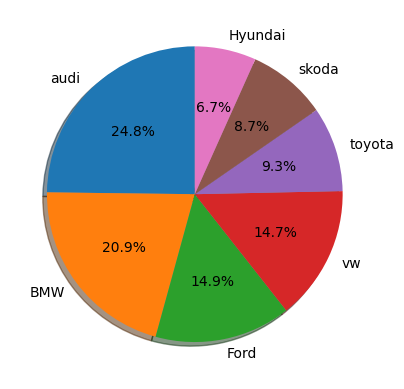

In [12]:
plt.pie(data.Make.value_counts(), labels=data.Make.unique(), autopct='%1.1f%%', shadow=True, startangle=90)

<Axes: xlabel='transmission', ylabel='count'>

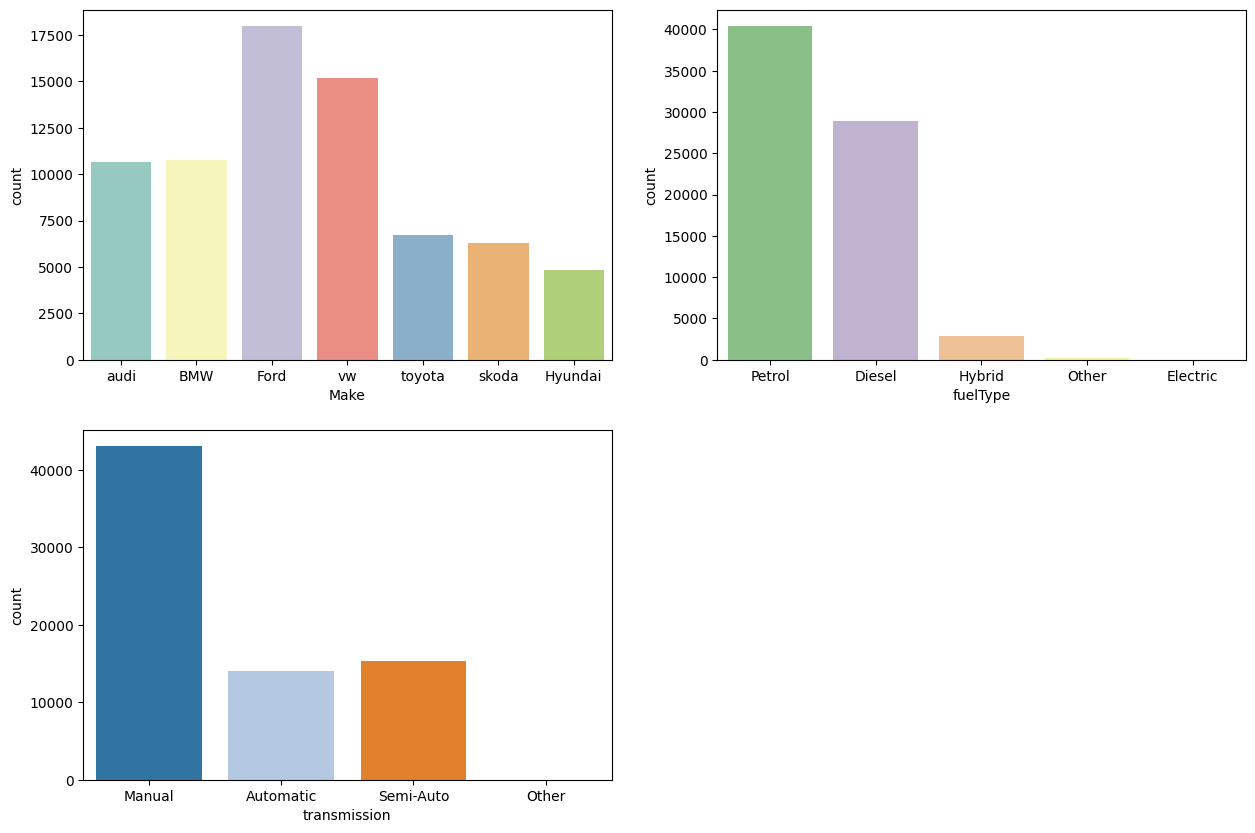

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Make', data = data, palette="Set3")
plt.subplot(2,2,2)
sns.countplot(x = 'fuelType', data = data, palette="Accent")
plt.subplot(2,2,3)
sns.countplot(x = 'transmission', data = data, palette="tab20")

Colomns meanings
Model: Model name
Year: Release date
Price: The price for the purchase of a car
Transmission: Type of transmission (Manual, Semi-auto, Automatic, Other)
Mileage: The distance covered by the car
Fuel type: Type of fuel (Petrol, Diesel, Hybrid, Other, Electric)
TAX: Road tax
MPG: Miles per gallon
Engine size: Engine displacement
Make: Company that made the car (Ford, Volkswagen, BMW, Audi, Toyota, Skoda, Hyundai)

In [14]:
carsDescription = pd.DataFrame({'Type' : ['Mean', 'Median', 'Standard_Deviation']})

carsDescription['Price'] = [round(data.price.mean(),2),round(data.price.median(),2),round(data.price.std(),2)]
carsDescription['Mileage'] = [round(data.mileage.mean(),2),round(data.mileage.median(),2),round(data.mileage.std(),2)]
carsDescription['MPG'] = [round(data.mpg.mean(),2),round(data.mpg.median(),2),round(data.mpg.std(),2)]
carsDescription['Year'] = [round(data.year.mean(),2),round(data.year.median(),2),round(data.year.std(),2)]
carsDescription

,Type,Price,Mileage,MPG,Year
0,Mean,16580.16,23176.52,55.85,2017.07
1,Median,14495.00,17531.00,55.40,2017.00
2,Standard_Deviation,9299.03,21331.52,17.11,2.10


From the table we see that the average mileage of cars is quite large - 23176 miles. The standard deviation is greater than we could assume: 21331 miles, which is practically a mean value, hence it follows that the choice of cars by mileage will be quite wide

A similar situation is observed with the price. The average value is 16580 pounds, and the deviation is about 9300 pounds

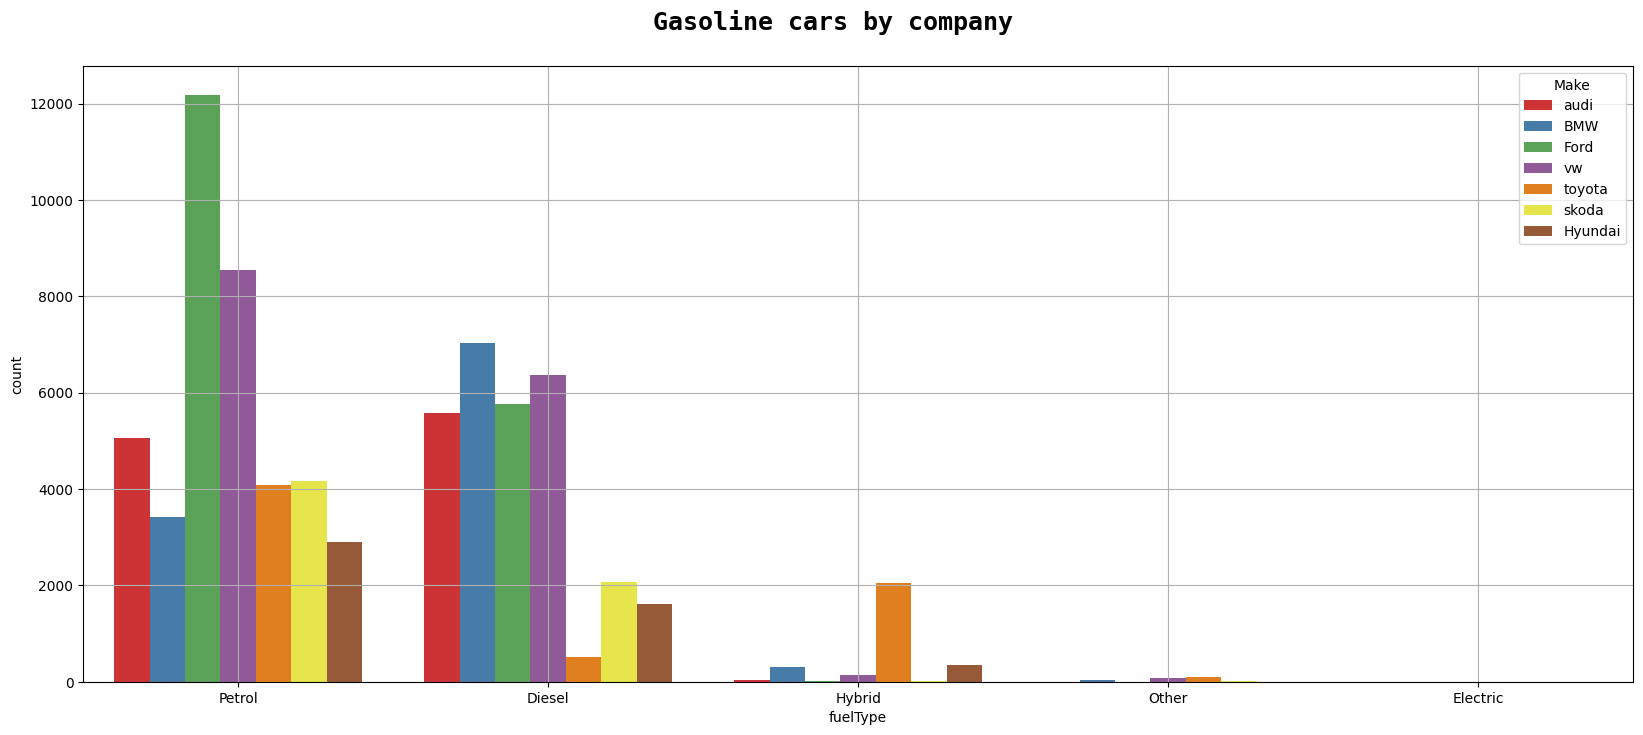

In [15]:
fig=plt.figure(figsize=(20,8))
plt.suptitle("Gasoline cars by company",x=0.5,y=0.95,
             family='monospace', size=18, weight='bold')

sns.countplot(data = data, x = 'fuelType',
              hue = 'Make', palette = 'Set1')#On the x-axis we group by the "fuelType" column and by the "Make" column of the data.

plt.grid()


According to this graph, we can understand that when searching for a car on the secondary market, we will most likely encounter a configuration where the type of fuel will be either gasoline or diesel, and if we are considering BMW, then it will be much easier to find a car with a diesel engine, the same can be said about Ford. But finding a diesel Toyota will be a difficult task. At the same time, if we have a task to find a hybrid car, then most likely we will encounter this particular brand of cars.

Text(0.5, 1.0, 'The price of the car depends on the year')

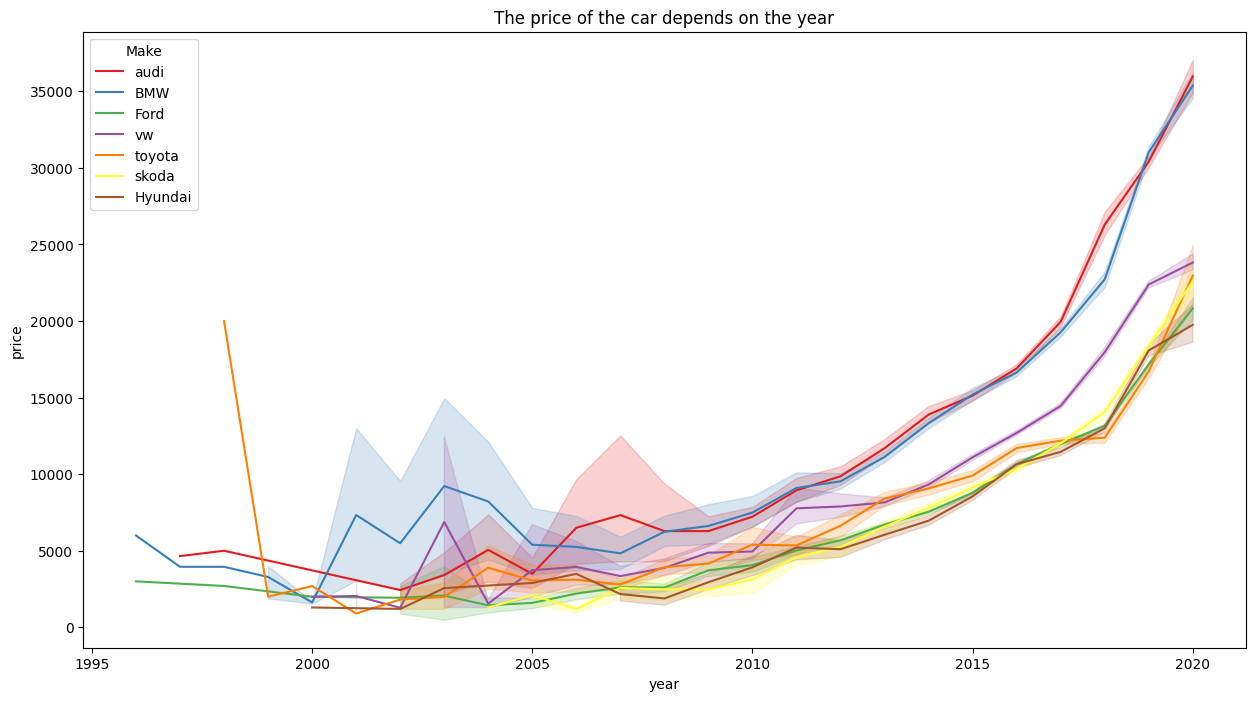

In [16]:
plt.figure(figsize = (15,8))
fig = sns.lineplot( y ='price',x = 'year', data = data, hue = 'Make', palette = 'Set1')
fig.set_title('The price of the car depends on the year')

According to this graph, it is easy to understand that Audi and BMW are the most expensive cars on the secondary market. Volkswagen is in third place. We can also conclude that the older the car is, the price difference between different brands decreases.

In [17]:
plt.figure(figsize = (15,10))

bmwDf = data.loc[data['Make'] == 'BMW']
px.histogram(bmwDf, x="model", color="fuelType",
             title='Distribution of gasoline types by BMW models')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'fuelType=Diesel<br>model=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Diesel',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Diesel',
              'offsetgroup': 'Diesel',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([' 5 Series', ' 5 Series', ' 1 Series', ..., ' 5 Series', ' 1 Series',
                          ' X1'], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'fuelType=Petrol<br>model=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Petrol',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Petrol',
              'offsetgroup': 'Petrol',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([' 6 Series', ' 2 Series', ' 1 Series', ..., ' 3 Series', ' 2 Series',
                          ' 3 Series'], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'fuelType=Other<br>model=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Other',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'Other',
              'offsetgroup': 'Other',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([' 3 Series', ' i3', ' 2 Series', ' 2 Series', ' X5', ' 3 Series',
                          ' 3 Series', ' 3 Series', ' 5 Series', ' i3', ' 3 Series', ' i3',
                          ' 3 Series', ' 3 Series', ' 3 Series', ' 3 Series', ' i8', ' X5',
                          ' 3 Series', ' 2 Series', ' i3', ' 3 Series', ' i3', ' 3 Series',
                          ' 3 Series', ' 3 Series', ' i3', ' 3 Series', ' 3 Series', ' 3 Series',
                          ' 3 Series', ' i3', ' X5', ' 3 Series', ' 3 Series', ' 3 Series'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'fuelType=Hybrid<br>model=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Hybrid',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'Hybrid',
              'offsetgroup': 'Hybrid',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([' 2 Series', ' X5', ' 3 Series', ..., ' 5 Series', ' X5', ' 3 Series'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'fuelType=Electric<br>model=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'Electric',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'Electric',
              'offsetgroup': 'Electric',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array([' i3', ' i3', ' i3'], dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'fuelType'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Distribution of gasoline types by BMW models'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'model'}},
               'yaxis': {'anchor': 'x

<Figure size 1500x1000 with 0 Axes>


According to this graph, it can be seen that BMW is presented mainly in diesel versions, with the exception of the M division, where cars have only gasoline engines. If we plan to buy a fully electric car, then only BMW i3 is represented on the secondary market among BMW. The choice among hybrid versions is much more. You can choose among BMW 2, 3, 5, 7 series, as well as among BMW X3, X5 and hybrid i3, i8.

In [18]:
difMake = ['BMW', 'audi', 'Ford', 'toyota', 'vw', 'skoda', 'Hyundai']
difTrans = ['Manual', 'Semi-Auto', 'Automatic', 'Other']

carsDescription = pd.DataFrame({'Auto' : difMake})


for i in difTrans:
    carsMean = []
    makeDf = data.loc[data['transmission'] == i]
    for j in difMake:
        carsTrans = makeDf.loc[data['Make'] == j]
        carsMean.append(round(carsTrans.price.mean(), 2))
    carsDescription[i] = carsMean
    
plt.figure(figsize = (15,10),)
px.histogram(carsDescription, x="Auto", y = difTrans, barmode = 'group',
             title='The price of different brands depending on the type of transmission')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'variable=Manual<br>Auto=%{x}<br>sum of value=%{y}<extra></extra>',
              'legendgroup': 'Manual',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Manual',
              'offsetgroup': 'Manual',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['BMW', 'audi', 'Ford', 'toyota', 'vw', 'skoda', 'Hyundai'], dtype=object),
              'xaxis': 'x',
              'y': array([14637.45, 16101.03, 11792.49,  9551.5 , 13709.17, 11658.52, 11059.05]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'variable=Semi-Auto<br>Auto=%{x}<br>sum of value=%{y}<extra></extra>',
              'legendgroup': 'Semi-Auto',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Semi-Auto',
              'offsetgroup': 'Semi-Auto',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['BMW', 'audi', 'Ford', 'toyota', 'vw', 'skoda', 'Hyundai'], dtype=object),
              'xaxis': 'x',
              'y': array([27359.75, 27161.78, 14919.03, 14797.14, 21654.32, 16285.11, 19119.22]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'variable=Automatic<br>Auto=%{x}<br>sum of value=%{y}<extra></extra>',
              'legendgroup': 'Automatic',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'Automatic',
              'offsetgroup': 'Automatic',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['BMW', 'audi', 'Ford', 'toyota', 'vw', 'skoda', 'Hyundai'], dtype=object),
              'xaxis': 'x',
              'y': array([22419.02, 28204.75, 15734.02, 16582.83, 22589.53, 20609.33, 16369.22]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'sum',
              'hovertemplate': 'variable=Other<br>Auto=%{x}<br>sum of value=%{y}<extra></extra>',
              'legendgroup': 'Other',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'Other',
              'offsetgroup': 'Other',
              'orientation': 'v',
              'showlegend': True,
              'type': 'histogram',
              'x': array(['BMW', 'audi', 'Ford', 'toyota', 'vw', 'skoda', 'Hyundai'], dtype=object),
              'xaxis': 'x',
              'y': array([   nan,    nan,    nan, 12795.,    nan, 15999., 14745.]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'The price of different brands depending on the type of transmission'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Auto'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sum of value'}}}
})

<Figure size 1500x1000 with 0 Axes>

Description
According to this graph, we can see that the cheapest versions of cars will be cars with a manual transmission. Interestingly, BMW cars on a semi-automatic transmission are more expensive than cars with an automatic transmission. At the same time, the difference between a semi-automatic and an automatic transmission will be about 5000 pounds, whereas among other cars it is much smaller. A similar situation can be observed at the manufacturer Hyundai. All ads of other brands were distributed so that a car with a manual transmission is the cheapest, and with an automatic one the most expensive option.

In [18]:
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

In [19]:
from sklearn import preprocessing

In [20]:
data.model = preprocessing.LabelEncoder().fit_transform(data.model)
data.transmission = preprocessing.LabelEncoder().fit_transform(data.transmission)
data.fuelType = preprocessing.LabelEncoder().fit_transform(data.fuelType)
data.Make = preprocessing.LabelEncoder().fit_transform(data.Make)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,15735,4,150.0,55.4,1.4,3
1,13,2016,16500,0,36203,0,20.0,64.2,2.0,3
2,8,2016,11000,1,29946,4,30.0,55.4,1.4,3
3,11,2017,16800,0,25952,0,145.0,67.3,2.0,3
4,10,2019,17300,1,1998,4,145.0,49.6,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,25906,0,0.0,78.4,1.6,2
72431,57,2015,7830,1,59508,0,30.0,65.7,1.7,2
72432,54,2017,6830,1,13810,4,20.0,60.1,1.0,2
72433,126,2018,13994,1,23313,4,145.0,44.8,1.6,2


In [22]:
data.mileage = standardize(data.mileage)
data.mpg = standardize(data.mpg)
data.tax = standardize(data.tax)
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,8,2017,12500,1,-0.348853,4,0.515989,-0.026439,1.4,3
1,13,2016,16500,0,0.610673,0,-1.513830,0.487752,2.0,3
2,8,2016,11000,1,0.317349,4,-1.357690,-0.026439,1.4,3
3,11,2017,16800,0,0.130113,0,0.437919,0.668887,2.0,3
4,10,2019,17300,1,-0.992834,4,0.437919,-0.365337,1.0,3
...,...,...,...,...,...,...,...,...,...,...
72430,56,2016,8680,1,0.127956,0,-1.826110,1.317469,1.6,2
72431,57,2015,7830,1,1.703195,0,-1.357690,0.575398,1.7,2
72432,54,2017,6830,1,-0.439096,4,-1.513830,0.248186,1.0,2
72433,126,2018,13994,1,0.006398,4,0.437919,-0.645805,1.6,2


In [23]:
data.describe()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
count,72435.000000,72435.000000,72435.000000,72435.000000,7.243500e+04,72435.000000,7.243500e+04,7.243500e+04,72435.000000,72435.000000
mean,58.453855,2017.073666,16580.158708,1.230358,1.726452e-17,2.319431,6.984281e-17,5.446170e-16,1.635650,2.890702
std,41.229274,2.101252,9299.028754,0.994658,1.000007e+00,1.930699,1.000007e+00,1.000007e+00,0.561535,2.174535
min,0.000000,1996.000000,495.000000,0.000000,-1.086452e+00,0.000000,-1.826110e+00,-3.245974e+00,0.000000,0.000000
25%,25.000000,2016.000000,10175.000000,1.000000,-7.488510e-01,0.000000,-1.357690e+00,-4.646695e-01,1.200000,1.000000
50%,49.000000,2017.000000,14495.000000,1.000000,-2.646580e-01,4.000000,4.379195e-01,-2.643876e-02,1.600000,3.000000
75%,85.000000,2019.000000,20361.000000,1.000000,4.346877e-01,4.000000,4.379195e-01,4.059489e-01,2.000000,5.000000
max,145.000000,2020.000000,145000.000000,3.000000,1.405552e+01,4.000000,7.230009e+00,2.424570e+01,6.600000,6.000000


In [23]:
cont = ["year", "fuelType", "mileage", "tax", "mpg", "engineSize"]
data_cont = data[cont] 

<Axes: >

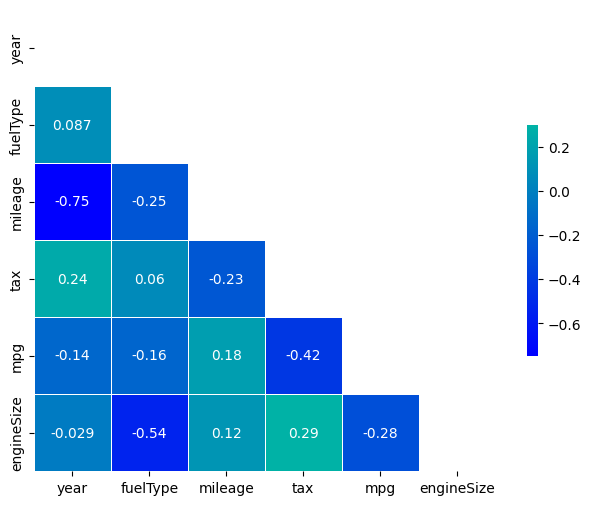

In [25]:
corr = data_cont.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="winter", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Moderate positive correlation between price & engineSize

Moderate negative correlation between year & mileage

In [24]:
from sklearn.utils import shuffle
data = shuffle(data)
y = data.price
data.drop('price', axis=1, inplace=True)
X = data

In [25]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
30660,43,2018,1,-0.333102,4,0.437919,0.107952,1.0,1
39892,116,2019,1,-0.992741,0,0.437919,-0.318593,1.6,6
51556,127,2019,1,-1.086031,4,0.437919,-0.090713,1.0,6
23798,42,2017,1,-0.405718,4,0.437919,0.487752,1.1,1
54015,50,2015,1,0.835553,4,0.125640,-0.318593,1.4,6
...,...,...,...,...,...,...,...,...,...
9058,11,2017,0,0.328178,0,0.437919,0.037835,2.0,3
49751,119,2018,3,-0.081876,4,0.437919,-1.031448,2.0,6
29801,42,2018,1,0.084312,4,0.437919,0.487752,1.1,1
11281,2,2018,3,0.234560,4,0.437919,-0.417925,2.0,0


In [26]:
y

30660    13900
39892    19980
51556     9885
23798     9800
54015    12490
         ...  
9058     22500
49751    26689
29801     9999
11281    20998
52901    29994
Name: price, Length: 72435, dtype: int64

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

Degree 1
R2 Score: 0.73
Mean Squared Error: 23324673.21
Mean Absolute Error: 3260.19
Mean Absolute Percentage Error: 0.25
Accuracy: 0.73


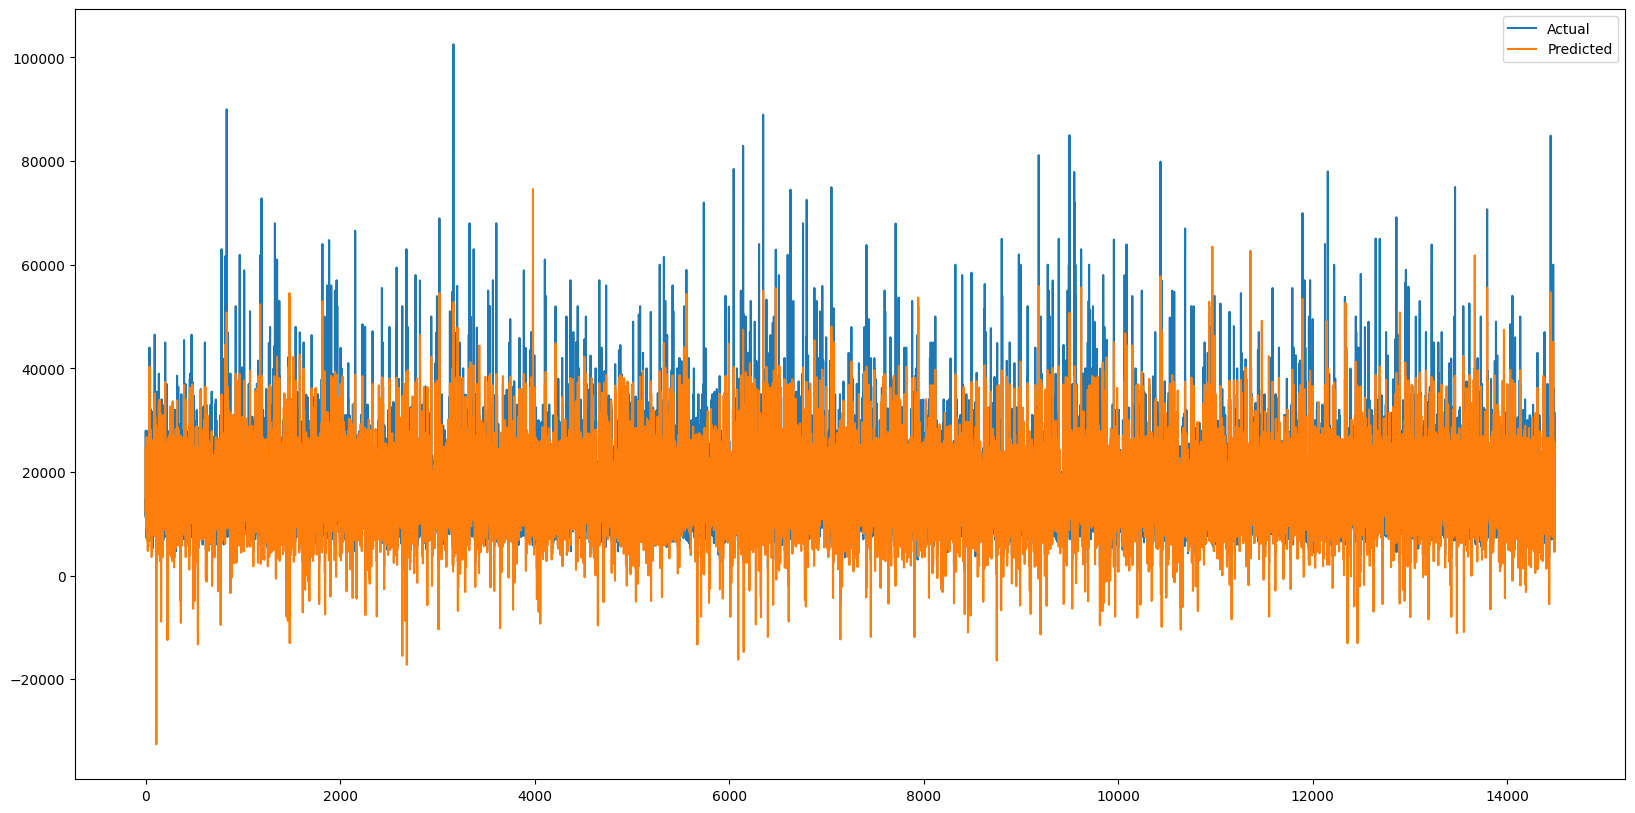


Degree 2
R2 Score: 0.83
Mean Squared Error: 14312917.65
Mean Absolute Error: 2545.14
Mean Absolute Percentage Error: 0.18
Accuracy: 0.83


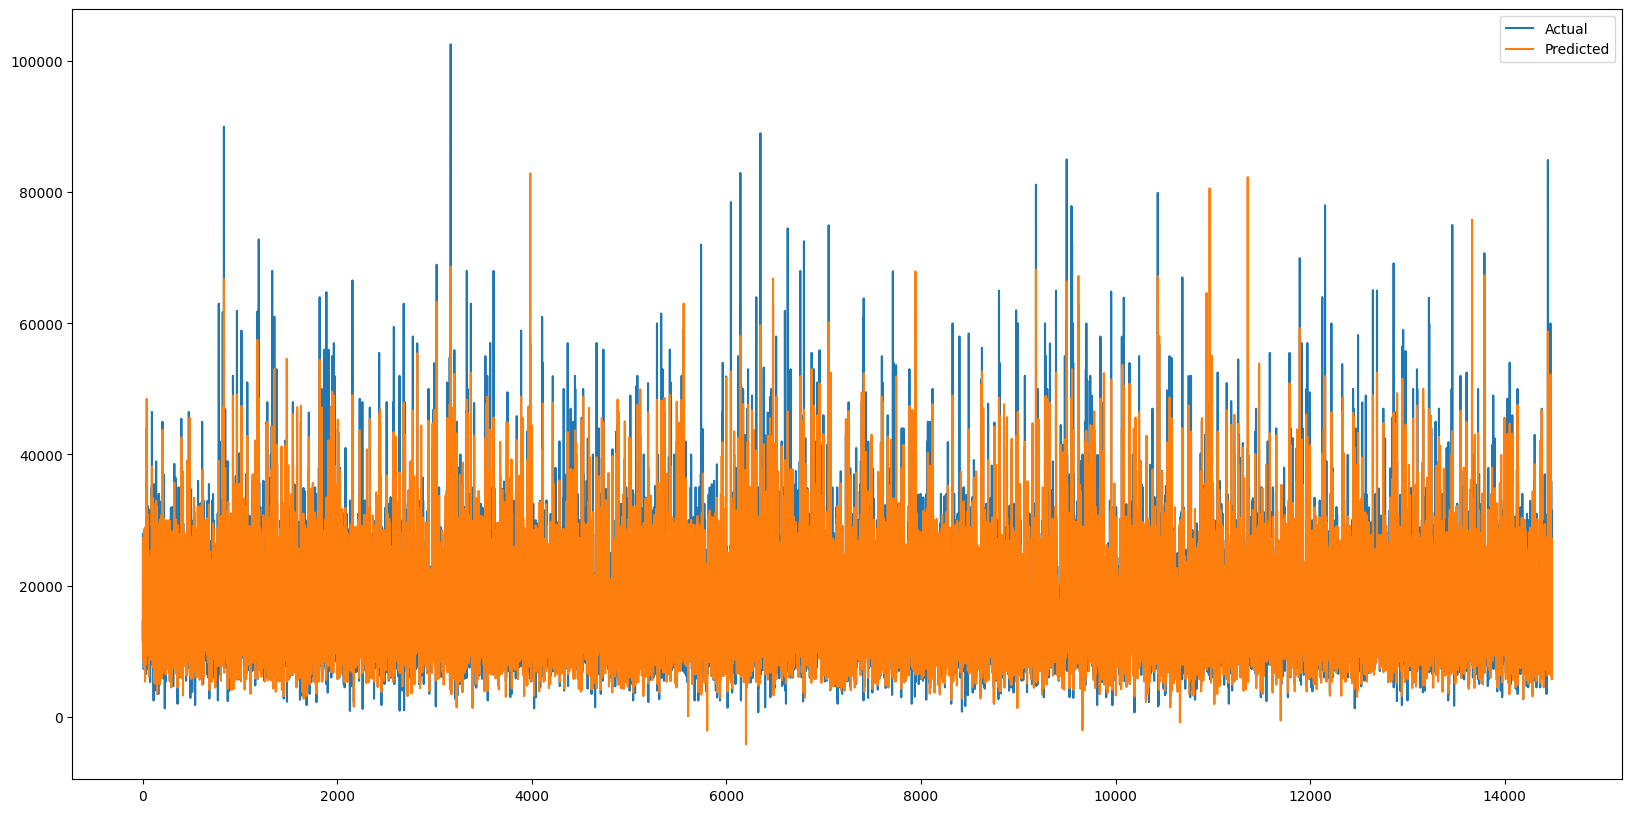


Degree 3
R2 Score: 0.88
Mean Squared Error: 10030375.59
Mean Absolute Error: 2138.86
Mean Absolute Percentage Error: 0.14
Accuracy: 0.88


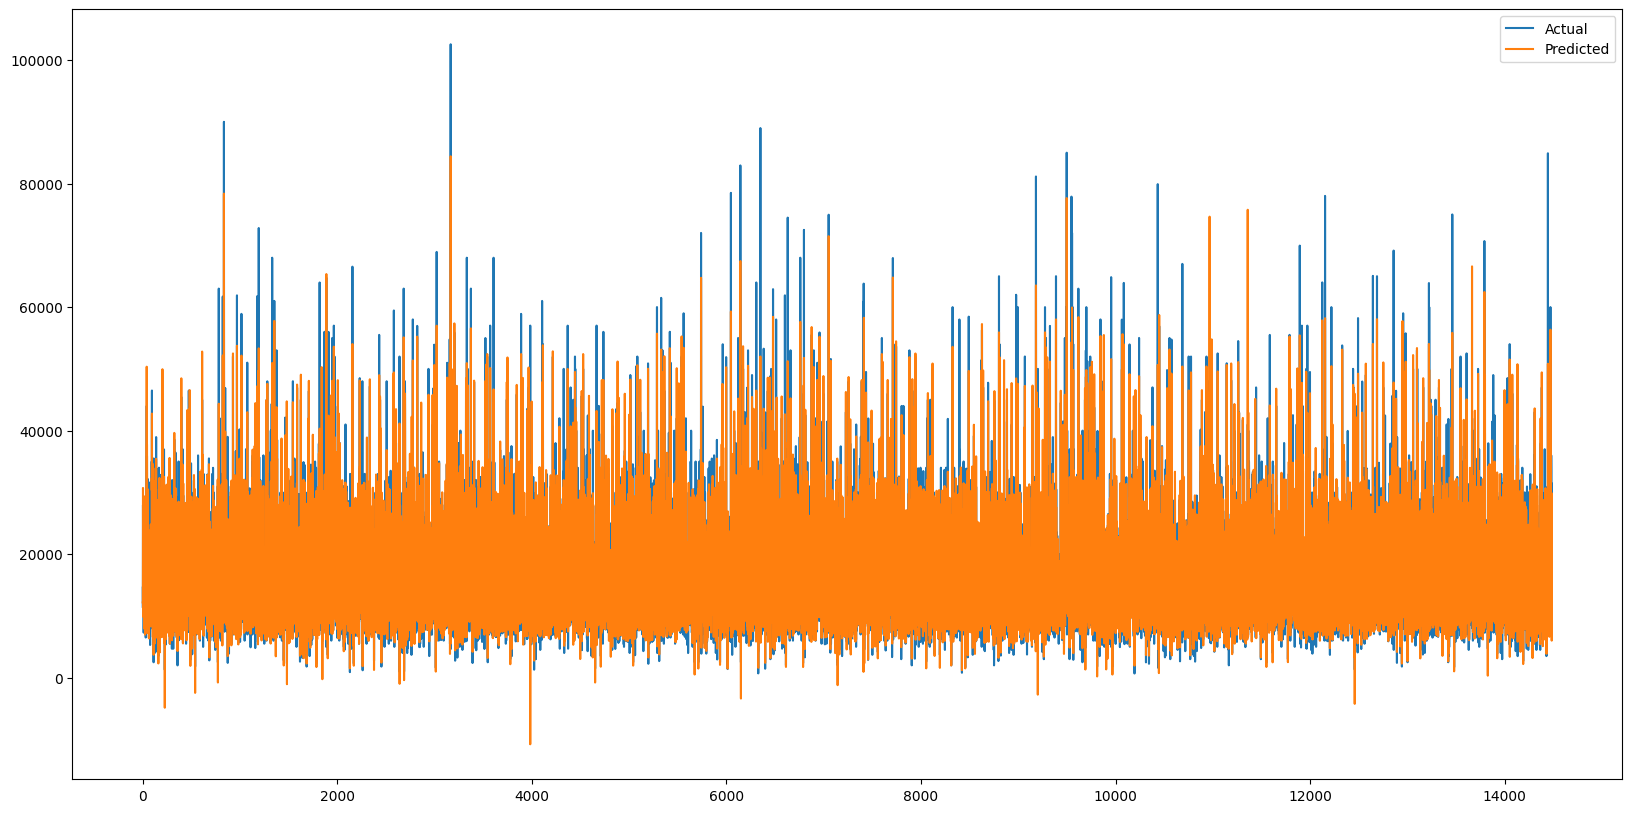


Degree 4
R2 Score: 0.7
Mean Squared Error: 25450361.02
Mean Absolute Error: 1892.35
Mean Absolute Percentage Error: 0.13
Accuracy: 0.7


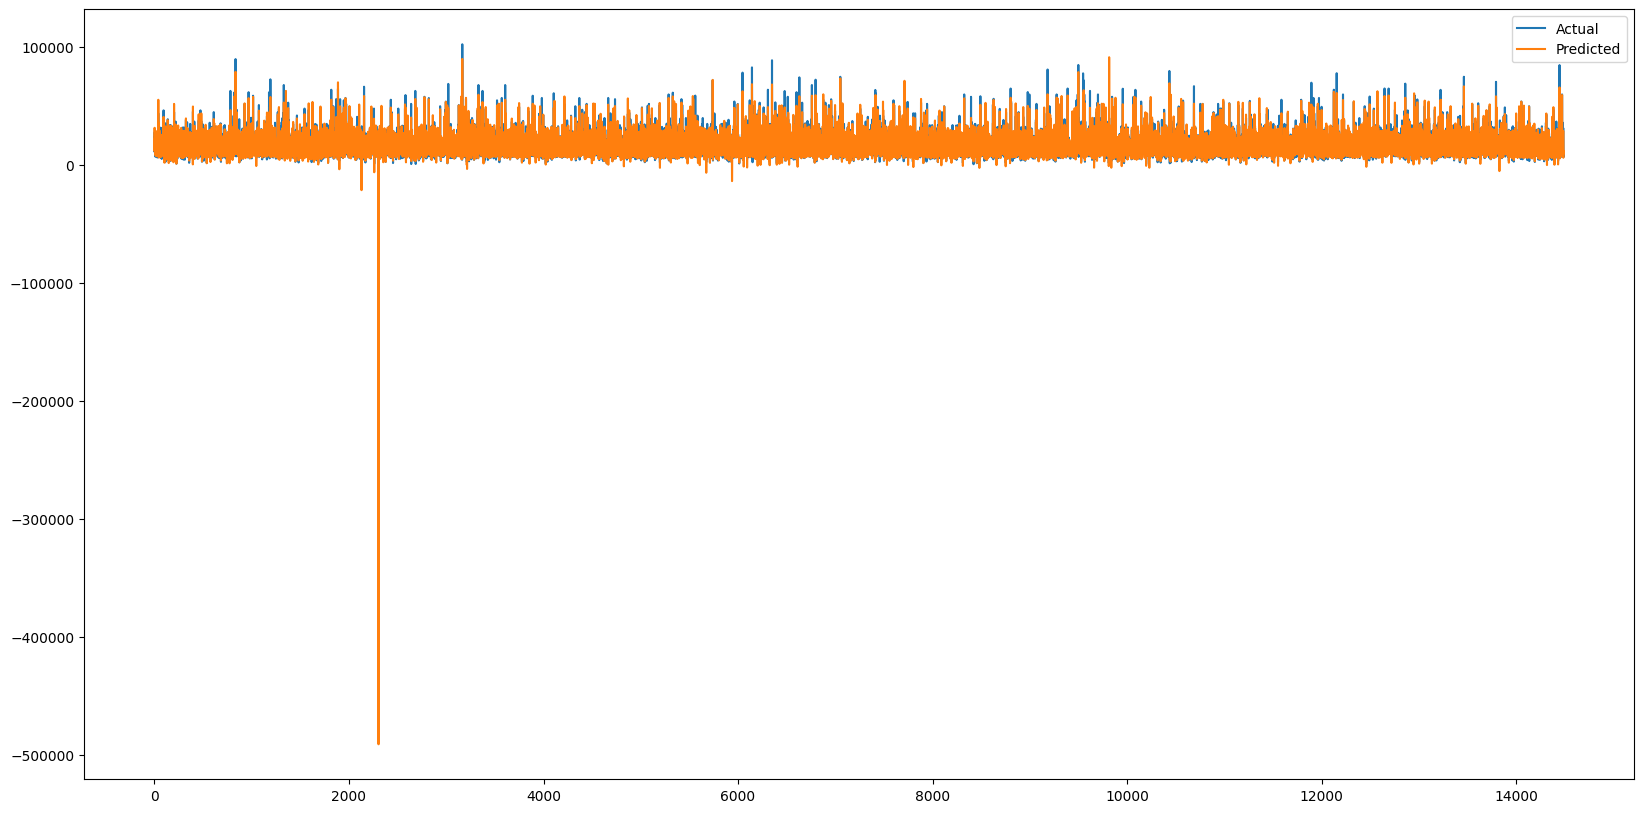


Degree 5
R2 Score: -18.98
Mean Squared Error: 1706225789.5
Mean Absolute Error: 1963.04
Mean Absolute Percentage Error: 0.13
Accuracy: -18.98


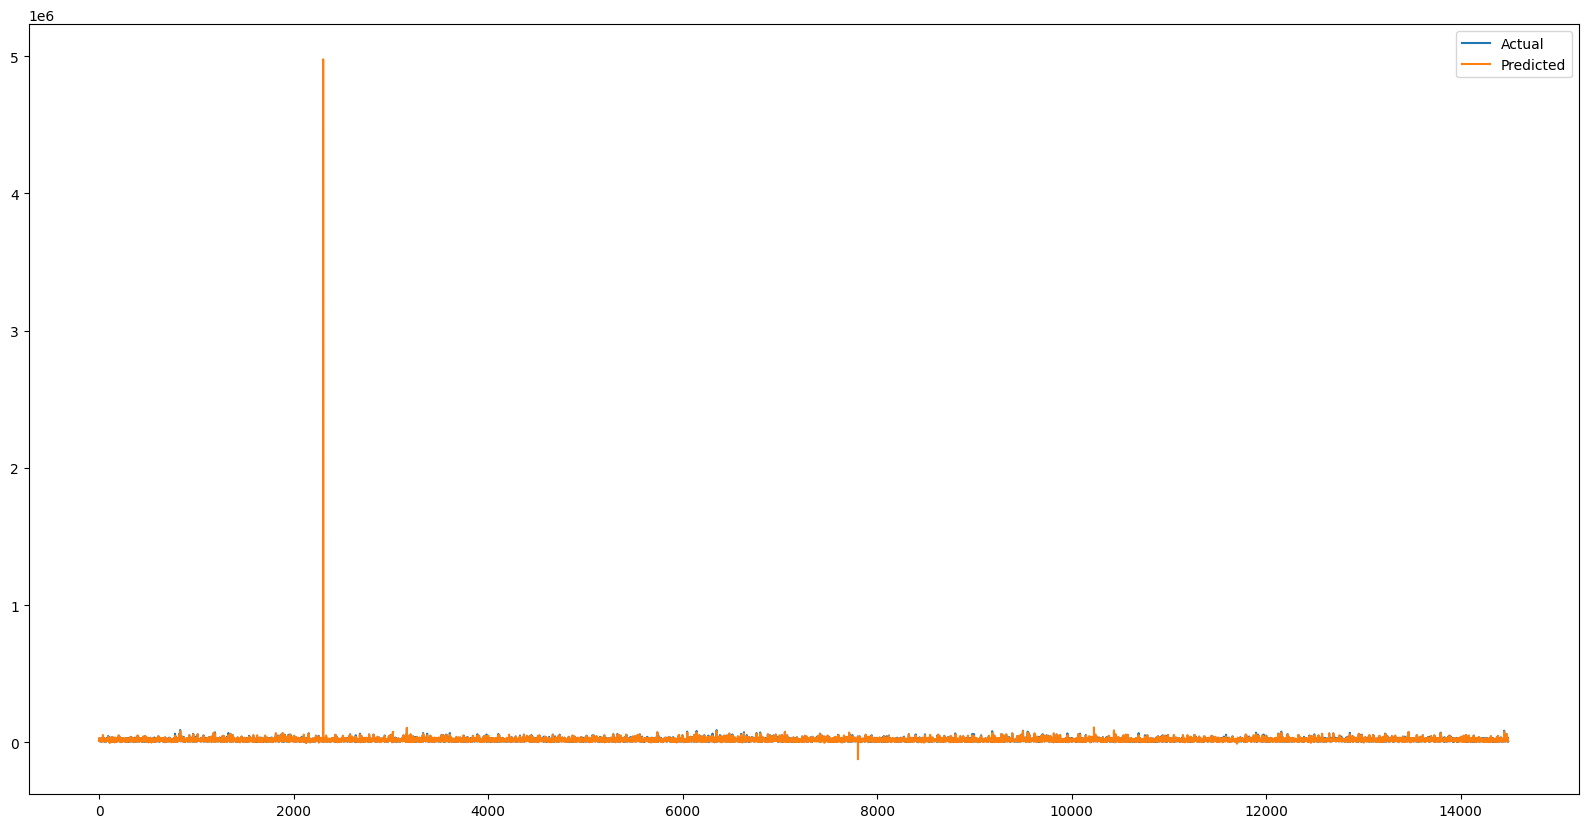


Degree 6
R2 Score: -12.86
Mean Squared Error: 1183168506.01
Mean Absolute Error: 1843.07
Mean Absolute Percentage Error: 0.13
Accuracy: -12.86


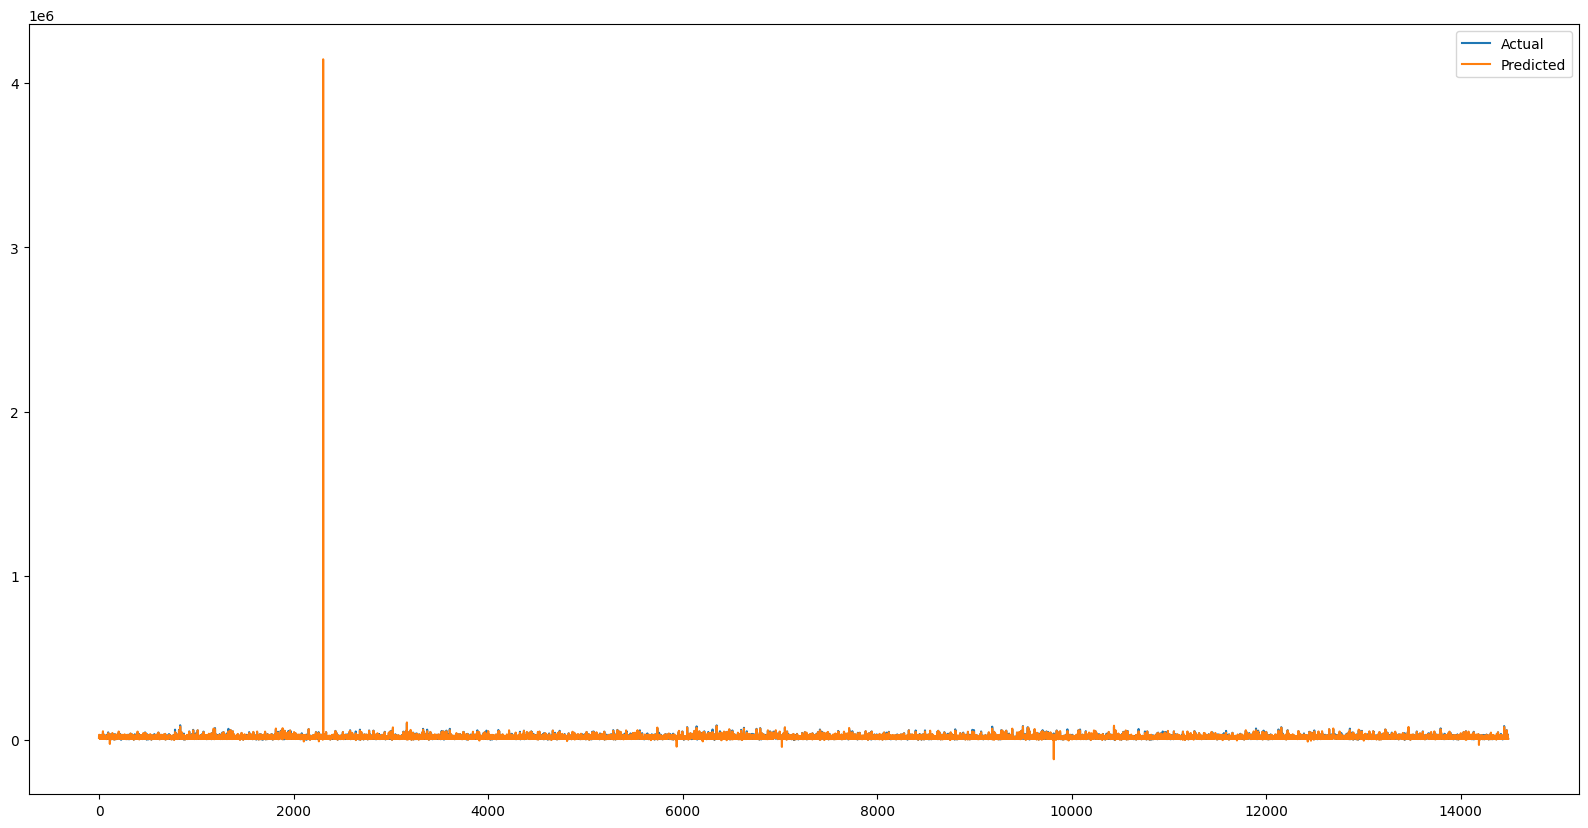

In [28]:
r2 = []
mse = []
mae = []
mape = []
accuracy = []
for i in range(1, 7):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
    Model = LinearRegression()
    Model.fit(X_train, y_train)
    y_pred = Model.predict(X_test)

    r2.append(round(r2_score(y_test, y_pred), 2))
    mse.append(round(mean_squared_error(y_test, y_pred), 2))
    mae.append(round(mean_absolute_error(y_test, y_pred), 2))
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred), 2))
    accuracy.append(round(Model.score(X_test, y_test), 2))

    print(f'Degree {i}')
    print(f'R2 Score: {r2[-1]}')
    print(f'Mean Squared Error: {mse[-1]}')
    print(f'Mean Absolute Error: {mae[-1]}')
    print(f'Mean Absolute Percentage Error: {mape[-1]}')
    print(f'Accuracy: {accuracy[-1]}')

    Y_Test_Pred = pd.DataFrame({"Y_Test": y_test, "Y_Pred": y_pred})
    Y_Test_Pred = Y_Test_Pred.reset_index()
    plt.figure(figsize=(20, 10))
    Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
    plt.plot(Y_Test_Pred)
    plt.legend(["Actual", "Predicted"])
    plt.show()
    print()

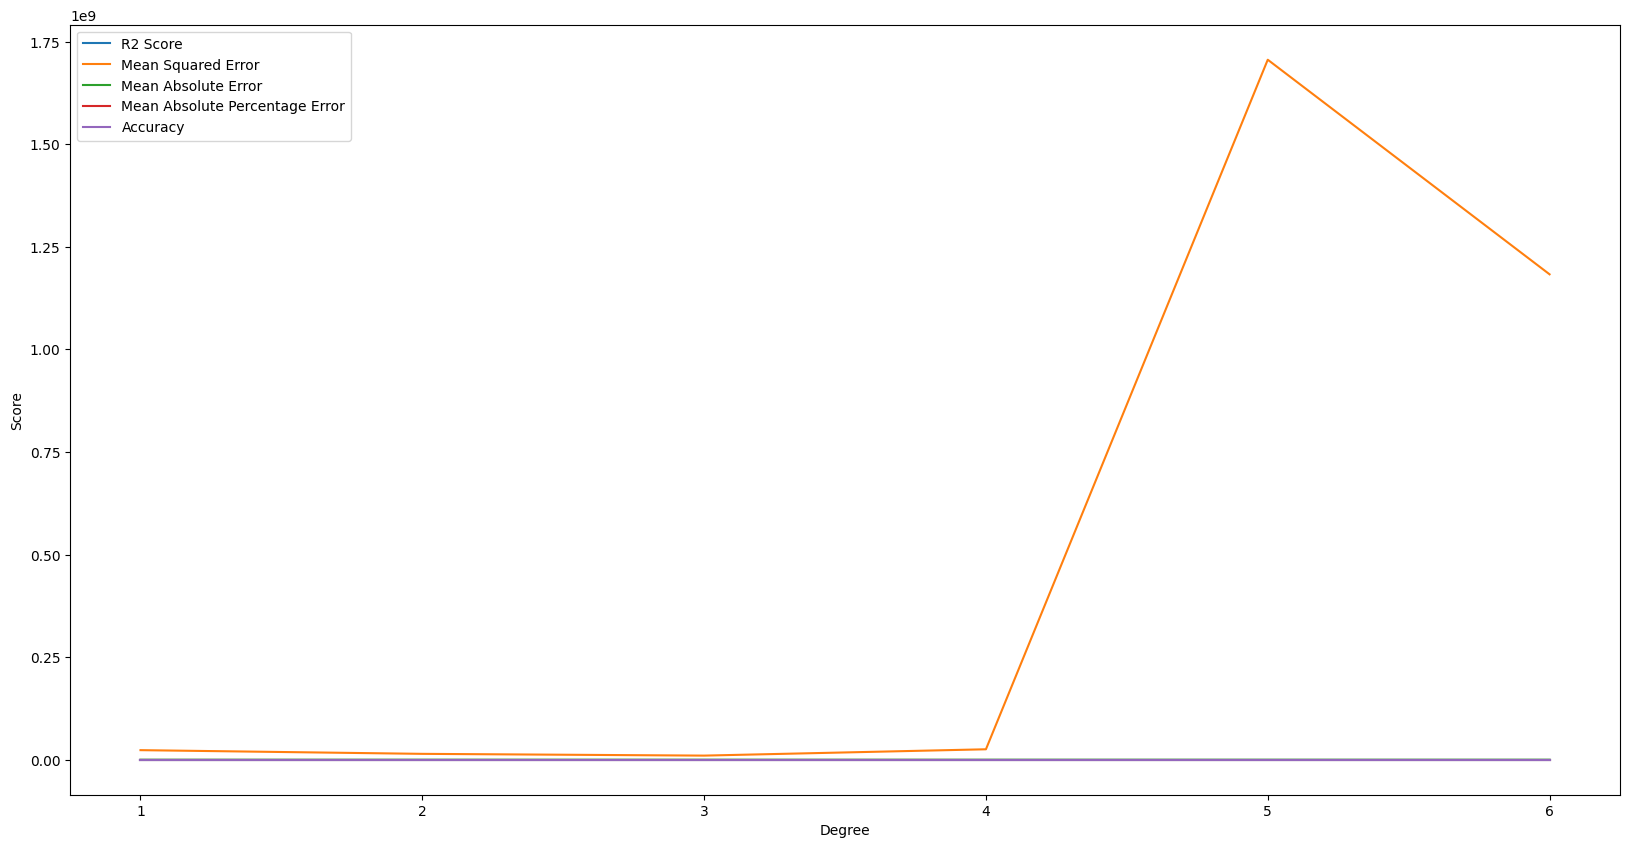

In [29]:
r2 = np.array(r2)
mse = np.array(mse)
mae = np.array(mae)
mape = np.array(mape)
_, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.linspace(1, 6, 6), r2, label='R2 Score')
ax.plot(np.linspace(1, 6, 6), mse, label='Mean Squared Error')
ax.plot(np.linspace(1, 6, 6), mae, label='Mean Absolute Error')
ax.plot(np.linspace(1, 6, 6), mape, label='Mean Absolute Percentage Error')
ax.plot(np.linspace(1, 6, 6), accuracy, label='Accuracy')
ax.set_xlabel('Degree')
ax.set_ylabel('Score')
plt.legend()
plt.show()

In [103]:
transmission_other = data[data['transmission'] == 'Other']
print(transmission_other)
data['transmission'] = data['transmission'].replace('Other', 'Manual')

         model  year  price transmission  mileage fuelType    tax   mpg   
57028    Yaris  2015  12795        Other    16733   Hybrid    0.0  78.0  \
67434    Scala  2019  15999        Other     3500   Petrol  145.0  47.1   
72314    Ioniq  2017  12495        Other    27779   Hybrid    0.0  78.5   
72336   Tucson  2017  16995        Other    25915   Petrol  145.0  39.8   

       engineSize     Make  
57028         1.5   toyota  
67434         1.0    skoda  
72314         1.6  Hyundai  
72336         1.6  Hyundai  


In [36]:
electric_fuel = data[data['fuelType'] == 'Electric']
print(electric_fuel)

other_fuel = data[data['fuelType'] == 'Other']
print(other_fuel)

Empty DataFrame
Columns: [model, year, transmission, mileage, fuelType, tax, mpg, engineSize, Make]
Index: []
Empty DataFrame
Columns: [model, year, transmission, mileage, fuelType, tax, mpg, engineSize, Make]
Index: []


In [37]:
data['fuelType'] = data['fuelType'].replace('Electric', 'Other')

There are several values of 'mpg' higher than 400, and seems to appear as outliers if we check the scatterplots.

However, these values seems to be very explainable for the BMW 'Make', since the values are for these cars. Considering that, the values will be kept.

 Data Preparation for Modeling

In [105]:
x = data.drop(['model', 'mileage'], axis=1)
z = data['mileage']

In [107]:
cars_categorical = x.select_dtypes(include=['object'])
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# drop categorical variables 
x = x.drop(list(cars_categorical.columns), axis=1)
# concat dummy variables with X
x = pd.concat([x, cars_dummies], axis=1)

In [108]:
cols = x.columns

# Scale the features and convert it back to a dataframe
x = pd.DataFrame(scale(x))

# Write in the column names again
x.columns = cols
x.columns

Index(['year', 'price', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'Make_Ford', 'Make_Hyundai',
       'Make_audi', 'Make_skoda', 'Make_toyota', 'Make_vw'],
      dtype='object')

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

Linear Regression

In [66]:
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Make prediction
y_pred = lm.predict(X_test)

# Performance metrics
lr_r2= r2_score(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)

# Show the metrics
print("Linear Regression R2: ", lr_r2)
print("Linear Regression MAE: ", lr_mae)

Linear Regression R2:  0.721972550099887
Linear Regression MAE:  3257.3688394622027


In [67]:
from sklearn.preprocessing import MinMaxScaler#preprocessing işlemden önce yapılacak şeyler 
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train
x_test

array([[0.15172414, 0.91666667, 0.33333333, ..., 0.14580234, 0.15151515,
        0.83333333],
       [0.59310345, 0.875     , 1.        , ..., 0.11710946, 0.3030303 ,
        0.5       ],
       [0.54482759, 0.875     , 0.33333333, ..., 0.12199787, 0.22727273,
        0.66666667],
       ...,
       [0.24137931, 0.875     , 0.33333333, ..., 0.13581296, 0.15151515,
        0.66666667],
       [0.08275862, 0.95833333, 0.        , ..., 0.10860786, 0.3030303 ,
        0.5       ],
       [0.02068966, 0.95833333, 0.        , ..., 0.10286929, 0.3030303 ,
        0.        ]])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5992\3250852042.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




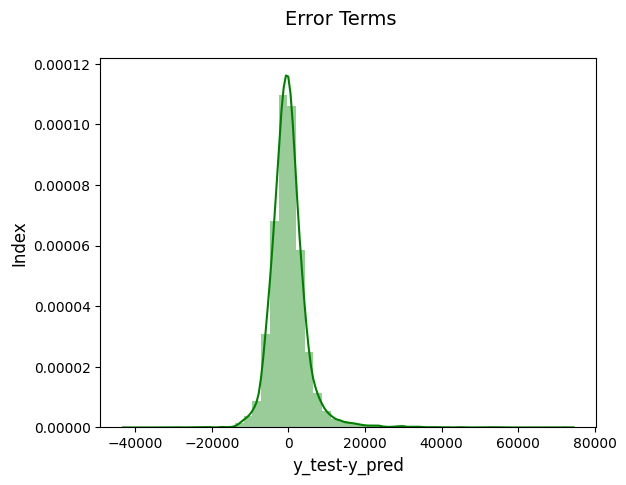

In [68]:
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50, color="green")
fig.suptitle('Error Terms', fontsize=14)                  
plt.xlabel('y_test-y_pred', fontsize=12)                  
plt.ylabel('Index', fontsize=12)                          
plt.show()

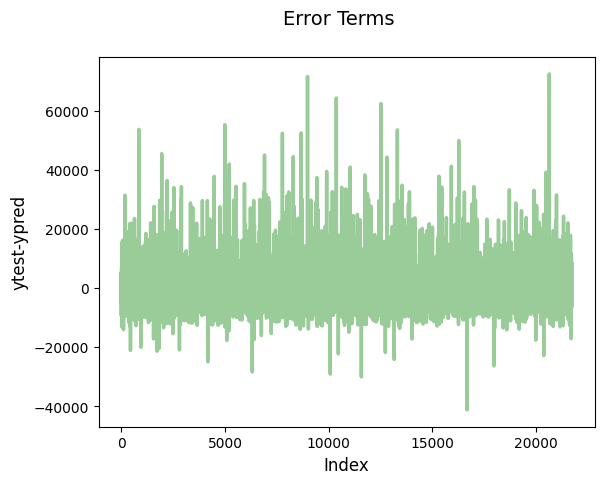

In [62]:
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="green", linewidth=2.5, linestyle="-", alpha=0.4)
fig.suptitle('Error Terms', fontsize=14)               
plt.xlabel('Index', fontsize=12)                      
plt.ylabel('ytest-ypred', fontsize=12)                
plt.show()

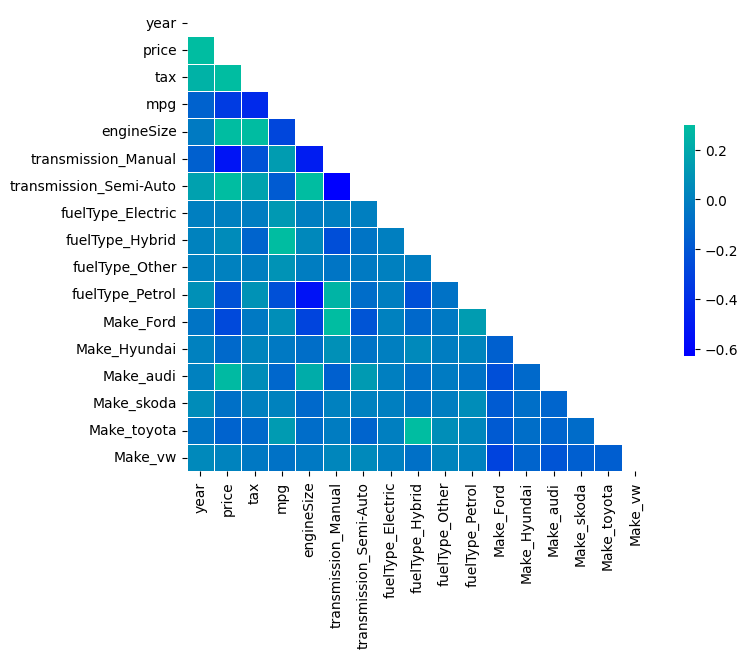

In [111]:
predictors = ['year', 'price', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'Make_Ford', 'Make_Hyundai',
       'Make_audi', 'Make_skoda', 'Make_toyota', 'Make_vw']

# Compute the correlation matrix
cors = x.loc[:, list(predictors)].corr()

# Generate a mask for the upper triangle
mask_2 = np.triu(np.ones_like(cors, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cors, mask=mask_2, cmap="winter", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
plt.show()

Some features are highly correlated.Multicollinearity occurs when there is a high correlation or dependence between independent variables.High VIF values are a sign of multicollinearity and can make the model's predictions unreliable. A high VIF indicates that one independent variable has a high correlation with other independent variables.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multivariate Adaptive Regression Splines (MARS)

In [74]:
from sklearn.tree import DecisionTreeRegressor  # Örnek olarak, bir Decision Tree Regressor kullanmak
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [75]:
# Initiate the model
mars_model = DecisionTreeRegressor()

# By default, we do not need to set any of the algorithm hyperparameters.
# The algorithm automatically discovers the number and type of basis functions to use.

# Fit the model
mars_model.fit(X_train, y_train)

# Making predictions
mars_y_pred = mars_model.predict(X_test)

# Performance Metrics
mars_r2 = r2_score(y_test, mars_y_pred)
mars_mae = mean_absolute_error(y_test, mars_y_pred)

# Show the model performance
print("MARS R2: ", mars_r2)
print("MARS MAE: ", mars_mae)

MARS R2:  0.919170263073064
MARS MAE:  1454.865959791184


Decision Tree Regression

In [76]:
from sklearn.model_selection import GridSearchCV

In [78]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_gs = GridSearchCV(dt_model,
                     param_grid = {'max_depth': range(1, 11),
                                   'min_samples_split': range(10, 60, 10)},
                     cv=5,
                     n_jobs=1,
                     scoring='neg_mean_squared_error')

dt_gs.fit(X_train, y_train)

print(dt_gs.best_params_)
print(-dt_gs.best_score_)

{'max_depth': 10, 'min_samples_split': 10}
6998651.996473683


In [79]:
# Initiate the best model
dt_model_best = DecisionTreeRegressor(max_depth=10, min_samples_split=20)

# Fit the best model
dt_model_best.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20)

In [80]:
# Make predictions
dt_y_pred = dt_model_best.predict(X_test)

# Performance metrics
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)

# Show the model performance
print("DT R2: ", dt_r2)
print("DT MAE: ", dt_mae)

DT R2:  0.9166774529214976
DT MAE:  1781.110074234309
